In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

import sys
import os
from joblib import Memory
import joblib

from backtest import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
DATA_PATH = '/Users/austingalm/Documents/GitHub/fpi_project_lab_autumn2024/data/'
CLASSIFIER_DATA_PATH = DATA_PATH + 'classifier_full/'
ANALYSIS_PATH = '/Users/austingalm/Documents/GitHub/fpi_project_lab_autumn2024/analysis/'

# Broad Assets Universe

In [3]:
UNIVERSE = 'broad_asset'
ASSETS = ['Asset ' + str(i) for i in range(1, 12)]

def assets_file_str_func(universe, assets):
    asset_nums = [asset.split(' ',1)[1] for asset in assets]
    return [universe + f'_{num}_' + 'features' for num in asset_nums]

In [4]:
backtest = Backtest(model=RandomForestClassifier(), base_per='2004-04-20', update_freq=26)

In [5]:
backtest.read_returns(data_path=DATA_PATH, universe_returns='broad_assets_weekly_rets')
backtest.compute_lookbacks()
# backtest.read_features(data_path=CLASSIFIER_DATA_PATH, features=FEATURES)
backtest.read_data(data_path=DATA_PATH, assets=ASSETS, universe=UNIVERSE, file_str_func=assets_file_str_func)

In [ ]:
param_grid = {#'pca__n_components': [0.9],
              'classifier__n_estimators': [10], 
              'classifier__min_samples_split': [300], 
              'classifier__max_depth': [2],}    # 'classifier__class_weight':['balanced_subsample']
backtest.record_strat_rets(assets=ASSETS, param_grid=param_grid)

In [7]:
backtest.strat_rets

,ML-Strategy Returns
Date,
2004-10-11,0.0041
2004-10-18,-0.0039
2004-10-25,0.0013
2004-11-01,0.0248
2004-11-08,0.0233
...,...
2024-08-05,-0.0404
2024-08-12,0.0351
2024-08-19,0.0476


,ML-Strategy Returns
Annualized Mean,0.0287
Annualized Vol,0.1065
Min,-0.2129
Max,0.2456
Skewness,-0.4615
Excess Kurtosis,8.8195
Historical VaR (5.00%),-0.0462
Annualized Historical VaR (5.00%),-0.1599
Historical CVaR (5.00%),-0.0730
Annualized Historical CVaR (5.00%),-0.2528


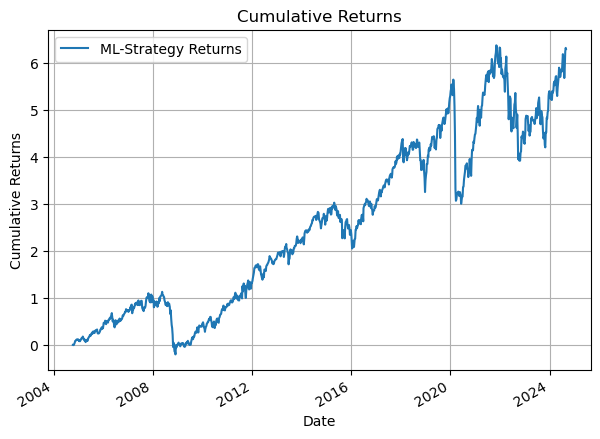

In [8]:
backtest.performance_summary()

In [9]:
display(backtest.predictions)
display(backtest.returns)

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2004-10-11,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-10-18,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-10-25,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-11-01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000
2004-11-08,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-08-12,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-08-19,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2000-07-31,0.0152,0.0757,-0.0023,0.0009,0.0422,0.0050,0.0373,0.0021,-0.0025,-0.0084,-0.0318
2000-08-07,0.0679,0.0526,0.0159,0.0134,0.0365,-0.0237,-0.0196,-0.0116,0.0241,-0.0266,0.0346
2000-08-14,0.0157,0.0023,0.0152,0.0063,0.0171,0.0254,0.0294,0.0369,0.0085,0.0063,0.0481
2000-08-21,0.0095,0.0566,-0.0018,-0.0003,0.0068,-0.0264,0.0016,-0.0024,0.0077,0.0018,0.0384
2000-08-28,0.0184,0.0653,0.0019,0.0041,0.0379,-0.0353,0.0195,-0.0170,0.0019,-0.0095,0.0313
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,0.0607,0.0718,-0.0440,-0.0147,0.0210,0.0425,0.0431,0.0882,0.0093,0.0503,0.0583
2024-08-19,0.1006,0.1346,0.0199,-0.0004,0.1037,0.0321,0.0931,0.0771,-0.0238,0.0239,-0.0377
2024-08-26,0.0020,-0.0266,0.0028,0.0064,0.0450,0.0540,0.0290,-0.0180,-0.0195,0.0097,0.0332


In [10]:
eval_rets = backtest.returns.loc[backtest.predictions.index]
equal_rets = (eval_rets * 1/len(eval_rets.columns)).sum(axis=1).to_frame('Equal Weight Portfolio Return')
equal_rets.describe()

,Equal Weight Portfolio Return
count,"1,039.0000"
mean,0.0027
std,0.0335
min,-0.2167
25%,-0.0118
50%,0.0035
75%,0.0188
max,0.2156


In [11]:
all_rets = pd.concat([equal_rets, backtest.strat_rets], axis=1)
calc_summary_statistics(all_rets, annual_factor=52, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,ML-Strategy Returns
Annualized Mean,0.1422,0.1244
Annualized Vol,0.2413,0.2217
Min,-0.2167,-0.2129
Max,0.2156,0.2456
Skewness,-0.1265,-0.4615
Excess Kurtosis,7.7660,8.8195
Historical VaR (5.00%),-0.0484,-0.0462
Annualized Historical VaR (5.00%),-0.3492,-0.3329
Historical CVaR (5.00%),-0.0781,-0.0730
Annualized Historical CVaR (5.00%),-0.5633,-0.5263


None

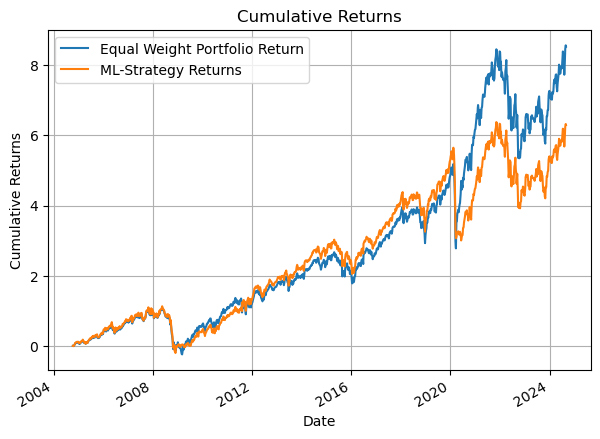

In [12]:
display(calc_cumulative_returns(all_rets))

# Equity Domestic Universe

In [13]:
UNIVERSE = 'equity_domestic'
ASSETS = ['Asset ' + str(i) for i in range(1, 47)]

def assets_file_str_func(universe, assets):
    asset_nums = [asset.split(' ',1)[1] for asset in assets]
    return [universe + f'_{num}_' + 'features' for num in asset_nums]

In [14]:
eqd_backtest = Backtest(model=RandomForestClassifier(), base_per='2004-04-10', update_freq=6)

In [15]:
eqd_backtest.read_returns(data_path=DATA_PATH, universe_returns='equity_domestic_monthly_rets')
eqd_backtest.compute_lookbacks(data_freq='monthly')
# backtest.read_features(data_path=CLASSIFIER_DATA_PATH, features=FEATURES)
eqd_backtest.read_data(data_path=DATA_PATH, assets=ASSETS, universe=UNIVERSE, file_str_func=assets_file_str_func)

In [ ]:
param_grid = {#'pca__n_components': [0.9],
              'classifier__n_estimators': [10], 
              'classifier__min_samples_split': [300], 
              'classifier__max_depth': [2],}    # 'classifier__class_weight':['balanced_subsample']
eqd_backtest.record_strat_rets(assets=ASSETS, param_grid=param_grid)

ValueError: Length mismatch: Expected axis has 239 elements, new values have 243 elements

# Investigation

In [19]:
eqd_backtest.lookbacks[-1]

datetime.datetime(2023, 11, 15, 0, 0)

In [22]:
start = eqd_backtest.lookbacks[0] + timedelta(days=4)

dates_inter = eqd_backtest.assets[ASSETS[0]].index
for asset in eqd_backtest.assets:
    cand = eqd_backtest.assets[asset].index
    dates_inter = cand if len(cand) > len(dates_inter) else dates_inter

dates_inter[dates_inter > start]

DatetimeIndex(['2004-06-01', '2004-07-01', '2004-08-02', '2004-09-01',
               '2004-10-01', '2004-11-01', '2004-12-01', '2005-01-03',
               '2005-02-01', '2005-03-01',
               ...
               '2023-11-01', '2023-12-01', '2024-01-02', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-03',
               '2024-07-01', '2024-08-01'],
              dtype='datetime64[ns]', name='Date', length=243, freq=None)

In [28]:
dates = []
for i in range(len(eqd_backtest.lookbacks)):
    start = eqd_backtest.lookbacks[i] + timedelta(days=1)
    end = eqd_backtest.lookbacks[i + 1] if i < len(eqd_backtest.lookbacks) - 1 else None 
    if end:
        dates.extend((dates_inter[(dates_inter > start) & (dates_inter < end)]))
    else:
        dates.extend((dates_inter[(dates_inter > start)]))

len(dates)

243

In [61]:
start = eqd_backtest.lookbacks[0] + timedelta(days=4)
start.strftime('%Y-%m-%d')

'2004-06-26'

In [36]:
monthly_rets = pd.read_excel(DATA_PATH + 'equity_domestic_monthly_rets.xlsx', index_col=0, parse_dates=True)
target = monthly_rets.shift(-1).dropna()
target = pd.DataFrame(np.where(target > 0, 1, 0), columns=target.columns, index=target.index)
target = target.loc[:eqd_backtest.lookbacks[0]]
target.melt(value_name='target', ignore_index=False)

,variable,target
Date,,
2001-01-03,Asset 1,0
2001-02-01,Asset 1,0
2001-03-01,Asset 1,0
2001-04-02,Asset 1,0
2001-05-01,Asset 1,0
...,...,...
2004-01-02,Asset 46,1
2004-02-02,Asset 46,1
2004-03-01,Asset 46,1


In [45]:
training_per = eqd_backtest.lookbacks[0]
target_df = pd.DataFrame()
for asset, frame in eqd_backtest.assets.items():
    asset_dates = frame.loc[:training_per].index
    target_df = pd.concat([target_df, eqd_backtest.target[asset].loc[asset_dates]], axis=0)

target_df = target_df.melt(value_name='target', ignore_index=False).dropna().drop(columns='variable')
target_df

,target
2004-02-02,1.0000
2004-03-01,0.0000
2004-04-01,1.0000
2004-05-03,0.0000
2004-02-02,1.0000
...,...
2004-05-03,0.0000
2004-02-02,1.0000
2004-03-01,1.0000
2004-04-01,0.0000


In [35]:
features_df = pd.concat([asset.loc[:eqd_backtest.lookbacks[0]] for asset in eqd_backtest.assets.values()], axis=0)
features_df

,MACD_Line,Signal_Line,MACD_Histogram,RSI,Stoch_RSI,SMA20,SMA90,SMA180,SMA240,Upper20,...,Asset_37,Asset_38,Asset_39,Asset_40,Asset_41,Asset_42,Asset_43,Asset_44,Asset_45,Asset_46
Date,,,,,,,,,,,,,,,,,,,,,
2004-02-02,0.0017,0.0122,-0.0105,31.1062,0.0000,1.5303,1.4540,1.3760,1.3209,1.5925,...,0,0,0,0,0,0,0,0,0,0
2004-03-01,0.0059,0.0064,-0.0005,62.7761,0.7450,1.5268,1.4899,1.4048,1.3526,1.5813,...,0,0,0,0,0,0,0,0,0,0
2004-04-01,0.0002,-0.0073,0.0075,56.7237,0.8440,1.4943,1.5025,1.4376,1.3869,1.5466,...,0,0,0,0,0,0,0,0,0,0
2004-05-03,0.0163,0.0176,-0.0013,63.9316,0.3562,1.5722,1.5277,1.4689,1.4194,1.6077,...,0,0,0,0,0,0,0,0,0,0
2004-02-02,0.0126,0.0175,-0.0049,46.0139,0.0000,1.2616,1.1662,1.1052,1.0691,1.2831,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-05-03,-0.0167,-0.0170,0.0003,40.0120,1.0000,1.2838,1.3135,1.2709,1.2697,1.3135,...,0,0,0,0,0,0,0,0,1,0
2004-02-02,0.0014,0.0020,-0.0006,44.8281,0.0000,1.1824,1.1730,1.1668,1.1624,1.1865,...,0,0,0,0,0,0,0,0,0,1
2004-03-01,0.0018,0.0018,0.0000,62.3244,0.5003,1.1865,1.1768,1.1697,1.1655,1.1906,...,0,0,0,0,0,0,0,0,0,1


In [46]:
features_df.index == target_df.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])